<a href="https://colab.research.google.com/github/aacasallas/TalentoTech_AlvaroCasallas/blob/main/Ingest_Data_API_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Se importan las librerias
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
API_KEY = '9c1bededc013c1b47a0ba2364a9c4b72'  # Reemplazar con tu API Key de OpenWeather
ciudad = 'Bogotá'
#id_city = '3688689'
#url = f'https://api.openweathermap.org/data/2.5/weather?id={id_city}&appid={API_KEY}&units=metric'
url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={API_KEY}&units=metric'

In [3]:
respuesta = requests.get(url)

if respuesta.status_code == 200:
    datos = respuesta.json()
    if 'main' in datos and 'weather' in datos:
        temperatura_actual = datos['main']['temp']
        descripcion_clima = datos['weather'][0]['description']
        print(f'Temperatura actual en {ciudad}: {temperatura_actual}°C')
        #print(f'Temperatura actual en {id_city}: {temperatura_actual}°C')
        #print(f'Descripción del clima: {descripcion_clima}')
    else:
        print('Error: No se encontraron los datos esperados en la respuesta.')
else:
    print(f'Error: No se pudo obtener los datos del clima. Código de estado: {respuesta.status_code}')

Temperatura actual en Bogotá: 12.73°C


In [4]:
# Reemplazar con tu API Key de OpenWeather
API_KEY = '9c1bededc013c1b47a0ba2364a9c4b72'

# Lista de ciudades colombianas
ciudades = ['Bogota', 'Medellin', 'Cali', 'Barranquilla', 'Cartagena', 'Cúcuta', 'Bucaramanga', 'Pereira', 'Santa Marta', 'Ibagué']

# Lista para almacenar los datos de temperatura
datos_temperatura = []

for ciudad in ciudades:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad},CO&appid={API_KEY}&units=metric'
    respuesta = requests.get(url)

    if respuesta.status_code == 200:
        datos = respuesta.json()
        if 'main' in datos:
            temperatura_actual = datos['main']['temp']
            datos_temperatura.append({'Ciudad': ciudad, 'Temperatura': temperatura_actual})
        else:
            print(f'Error: No se encontraron los datos de temperatura para {ciudad}.')
    else:
        print(f'Error: No se pudo obtener los datos del clima para {ciudad}. Código de estado: {respuesta.status_code}')

# Crear un DataFrame de Pandas con los datos de temperatura
df_temperatura = pd.DataFrame(datos_temperatura)

print(df_temperatura)

         Ciudad  Temperatura
0        Bogota        12.73
1      Medellin        18.94
2          Cali        23.00
3  Barranquilla        25.88
4     Cartagena        28.79
5        Cúcuta        27.97
6   Bucaramanga        21.73
7       Pereira        17.83
8   Santa Marta        26.61
9        Ibagué        20.95


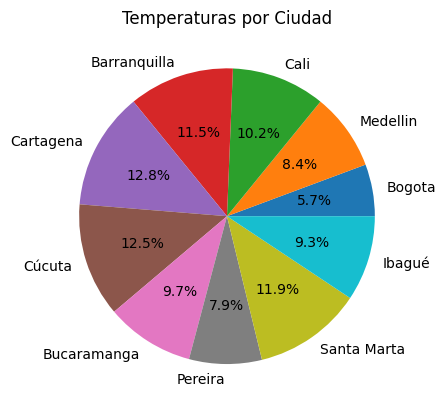

In [5]:
# Data preparation
df_temperatura.groupby('Ciudad')['Temperatura'].count().reset_index()

# Creating a pie chart

total_temperatura = df_temperatura['Temperatura'].sum()
df_temperatura['Porcentaje'] = (df_temperatura['Temperatura'] / total_temperatura) * 100


#Grafica pie de la temperatura por ciudad
plt.pie(df_temperatura['Temperatura'], labels=df_temperatura['Ciudad'], autopct='%1.1f%%')




# Adding a title
plt.title('Temperaturas por Ciudad')
plt.show()

Link de informacion api key
registrarse y para obtener api key

https://openweathermap.org/current

Built-in API request by city ID
You can make an API call by city ID. List of city ID 'city.list.json.gz' can be downloaded here.

We recommend to call API by city ID to get unambiguous result for your city.
https://bulk.openweathermap.org/sample/